# Nishchay N
## PES University, Bangalore

### Problem: "Super Charger Model 1"

# **Input Data**

## Engine Parameters

In [55]:
Vs = 0.0028   # Swept Volume (m^3)
nm = 80       # Mechanical Efficiency (%)
ni = 74       # Isentropic Efficiency (%)
Cp = 1.005    # Specific Heat Capacity (J/KgK)

## Super Charger

In [56]:
p1 = 1.013    # Atmospheric Pressure (bar)
t1 = 288      # Atmospheric Temp (K)
pr = 1.6      # Pressure Ratio
g  = 1.4      # Adibatic Gas Constant
R  = 287      # Real Gas Contant (J/KgK)

Case 1: At a Constant Engine Speed

In [57]:
N  = 4000     # Engine Speed (rpm)
ip = 12.5     # Avg Indicated Power (KW/m^3)
nv = 85       # Volumetric Efficiency (%)

In [58]:
# Supercharger Pressure Output
p2 = pr*p1    # in bar

# Engine Temp Output
t21 = t1 * (p2/p1)**((g-1)/g)  # in K

# SuperCharger Temp Output
t2 = t1+((t21-t1)/(ni/100.0))

# Piston Swept Voulme
Vs1 = (Vs*(N/2))

# Equivalent Volume
Ve = (Vs1*p2*t1)/(t2*p1)

# Voulmetric Efficiency of SuperCharger
nv1 = (Ve/Vs1)*100

In [59]:
# UnsuperCharger Induced Volume
Vi = Vs1*(nv/100.0)

# Increment in Induced Volume (Due to Supercharger)
Vii = Ve-Vi

# Increment in Indicated Power Due to Volume of Air
ipa = ip*Vii

# Increment in the Indicated Power Due To Pressure of Air
ipi = ((p2-p1)*(10**5)*Vs1)/(60*1000)

# Total Increment in the Induced Power
ipt = ipa + ipi

In [60]:
# Increment in the Brake Power of Engine
bp = ipt * (nm/100.0)

# Increment of Brake Power without SuperCharger
bpe = ip* (nm/100.0)

# Mass of Air Delivered to SuperCharger
ma = (p2*(Vs1/60.0)*(10**5))/(R*t2)

# Power Consumed by SuperCharger
P = ma*Cp*(t2-t1)

# Power Delivered to the SuperCharger to run
Pd = P/(nm/100.0)

# Net Increment in Brake Power (Having SuperCharger)
bpn = bp - Pd

Results

In [61]:
print("Engine Indicated Power Without Super Charger is {} KW".format(round(ip)))
print("Engine Indicated Power With The Super Charger is {} KW".format(round(ipt)))

print("Engine Brake Power Without Super Charger is {} KW".format(round(bpe)))
print("Engine Brake Power With The Super Charger is {} KW".format(round(bpn)))

print("Volumetric Efficiency of the Engine with the SuperCharger is {} %".format(round(nv1)))

Engine Indicated Power Without Super Charger is 12 KW
Engine Indicated Power With The Super Charger is 40 KW
Engine Brake Power Without Super Charger is 10 KW
Engine Brake Power With The Super Charger is 21 KW
Volumetric Efficiency of the Engine with the SuperCharger is 134 %


Case 2: Analysis of Effects of BP and IP using Engine.csv, Engine o/p with and without supercharger for different speed

In [62]:
# Importing Required Libraries
import pandas as pd
print(pd.__version__)

1.1.5


In [63]:
# Importing Engine.csv
data = pd.read_csv('Engine.csv')
data.head(n=10)

,Speed (rpm),Volumetric Efficiency (%),Indicated Power (Kw)
0,1000,70,10
1,2000,76,13
2,3000,80,16
3,4000,82,20
4,5000,85,21
5,6000,86,22
6,7000,88,24
7,8000,90,26
8,9000,91,28
9,10000,93,30


In [64]:
# Supercharger Pressure Output
p2 = pr*p1    # in bar

# Engine Temp Output
t21 = t1 * (p2/p1)**((g-1)/g)  # in K

# SuperCharger Temp Output
t2 = t1+((t21-t1)/(ni/100.0))

# Piston Swept Voulme
Vs1 = (Vs*(data['Speed (rpm)']/2))

# Equivalent Volume
Ve = (Vs1*p2*t1)/(t2*p1)

# Voulmetric Efficiency of SuperCharger
nv1 = (Ve/Vs1)*100

In [65]:
# UnsuperCharger Induced Volume
Vi = Vs1*(data['Volumetric Efficiency (%)']/100.0)

# Increment in Induced Volume (Due to Supercharger)
Vii = Ve-Vi

# Increment in Indicated Power Due to Volume of Air
ipa = data['Indicated Power (Kw)']*Vii

# Increment in the Indicated Power Due To Pressure of Air
ipi = ((p2-p1)*(10**5)*Vs1/(60*1000))

# Total Increment in the Induced Power
data['Total Indicated Power (Kw)'] = ipa + ipi

In [66]:
# Increment in the Brake Power of Engine
bp = data['Total Indicated Power (Kw)'] * (nm/100.0)

# Increment of Brake Power without SuperCharger
data['Brake Power Without SuperCharger (Kw)'] = data['Indicated Power (Kw)']* (nm/100.0)

# Mass of Air Delivered to SuperCharger
ma = (p2*(Vs1/60.0)*(10**5)/(R*t2))

# Power Consumed by SuperCharger
P = ma*Cp*(t2-t1)

# Power Delivered to the SuperCharger to run
Pd = P/(nm/100.0)

# Net Increment in Brake Power (Having SuperCharger)
data['Net Increment in the brake Power (Kw)'] = bp - Pd

In [67]:
# Viewing Data
data.head(n=10)

,Speed (rpm),Volumetric Efficiency (%),Indicated Power (Kw),Total Indicated Power (Kw),Brake Power Without SuperCharger (Kw),Net Increment in the brake Power (Kw)
0,1000,70,10,10.375257,8.0,5.608021
1,2000,76,13,23.940748,10.4,13.768230
2,3000,80,16,40.528472,12.8,24.346225
3,4000,82,20,63.889254,16.0,40.342666
4,5000,85,21,79.090096,16.8,49.811156
5,6000,86,22,97.174349,17.6,61.586374
6,7000,88,24,118.069953,19.2,75.610673
7,8000,90,26,139.412381,20.8,89.992430
8,9000,91,28,164.393630,22.4,107.285246
9,10000,93,30,186.293703,24.0,122.113120


Plotting

In [68]:
# Indicated Power and Brake Power wrt Engine Speed

# Import Required Library
import matplotlib.pyplot as plt

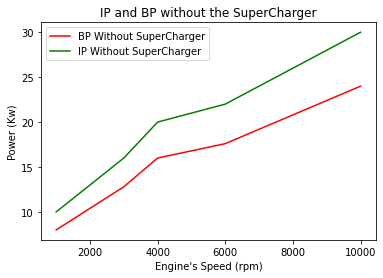

In [69]:
plt.plot(data['Speed (rpm)'],data['Brake Power Without SuperCharger (Kw)'],'r',label = 'BP Without SuperCharger')
plt.plot(data['Speed (rpm)'],data['Indicated Power (Kw)'],'g',label = 'IP Without SuperCharger')
plt.title("IP and BP without the SuperCharger")
plt.xlabel("Engine's Speed (rpm)")
plt.ylabel("Power (Kw)")
plt.legend(loc='best')
plt.show()

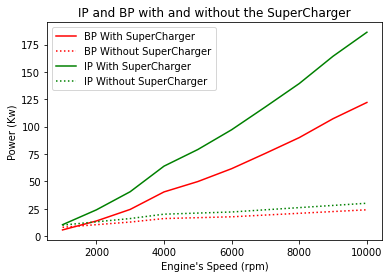

In [70]:
plt.plot(data['Speed (rpm)'],data['Net Increment in the brake Power (Kw)'],'-r',label = 'BP With SuperCharger')
plt.plot(data['Speed (rpm)'],data['Brake Power Without SuperCharger (Kw)'],':r',label = 'BP Without SuperCharger')
plt.plot(data['Speed (rpm)'],data['Total Indicated Power (Kw)'],'-g',label = 'IP With SuperCharger')
plt.plot(data['Speed (rpm)'],data['Indicated Power (Kw)'],':g',label = 'IP Without SuperCharger')
plt.title("IP and BP with and without the SuperCharger")
plt.xlabel("Engine's Speed (rpm)")
plt.ylabel("Power (Kw)")
plt.legend(loc='best')
plt.show()